## PARA ESTA SELECCIÓN DE VARIABLES ADEMÁS DE LOS VOTANTES QUE SE USARÁN PARA LA INCLUSIÓN O NO DE VARIABLES, SE REALIZÓ REUNIÓN CON EL NEGOCIO, FUNCIONALES, INGENIEROS DE DATOS, CIENTÍFICOS DE DATOS Y GERENTES DE ANALÍTICA, ESTO, CON EL FIN DE Y EN CONSENSO ACEPTAR O RECHAZAR VARIABLES DE ENTRADA Y POR CRITERIO EXPERTO. 
## SE HACE LA ANOTACIÓN DE QUE EXISTEN VARIABLES BLOQUEADAS POR EL NEGOCIO, ES DECIR, ENTRAN AL MODELO POR SUGERENCIA.

## NOTA: LAS VARIABLES RECHAZADAS DE ENTRADA SE PUEDEN ENCONTRAR EN EL DOCUMENTO ESTRATEGÍAS DE INFORMACIÓN QUE SE ENCUENTRA EN LA CARPETA COMPARTIDA DEL GRUPO DE LA CÉLULA ANALÍTICA DE BANISTMO EN TEAMS


In [1]:
#carga librerias python 
#import librerias necesarias 
from sklearn import preprocessing as prep
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,explained_variance_score
from sklearn.metrics import roc_auc_score, confusion_matrix, silhouette_score,silhouette_samples
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.neighbors import kneighbors_graph
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.calibration import calibration_curve
from matplotlib import pyplot
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing     import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from pprint import pprint
from sklearn.linear_model import LassoCV
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV 
from sklearn.datasets import make_classification
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import *
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import RidgeCV
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',150)
pd.set_option('display.width',1000)

In [2]:
#carga base de datos completa
df1 = pd.read_csv("D:/dsosa/score_banistmo_2020/base_reentrenamiento_2020_new.csv",header = 0, sep = ';')

In [3]:
df1.isnull().sum()

fecha                            0
id                               0
atm_fa_cont                      0
marca_rodamiento                 0
marca_huesped_pura               0
marca_perdio_ddir                0
marca_mora_sup_61                0
cast_fa                          0
ddir_cliente                     0
saldok                           0
cnt_b2b                          0
cnt_auto                         0
cnt_pp                           0
cnt_sob                          0
cnt_tdc                          0
max_madurez_b2b                  0
max_madurez_auto                 0
max_madurez_pp                   0
max_madurez_sob                  0
max_madurez_tdc                  0
madurez                          0
prom_atm_fa_12m                  0
std_atm_fa_12m                   0
prom_atm_fa_6m                   0
std_atm_fa_6m                    0
prom_atm_fa_3m                   0
std_atm_fa_3m                    0
vari_atm_fp0_3m                  0
vari_atm_fp0_6m     

In [4]:
#base de entrenamiento. se seleccionan 4 años los cuáles recogen suficiente historia de clientes en banistmo.
df_entrenar = df1[(df1.fecha>=201407) & (df1.fecha<=201807)]

In [5]:
df_entrenar.shape

(4398017, 39)

### Adición Ruidos
con el fin de encontrar un punto de corte entre las variables seleccionadas se decide crear 2 columnas adicionales de ruido: ruido uniforme y ruido normal, estas variables al final y dependiendo del puntaje asignado por los votantes pueden ayudar a seleccionar dicho punto de corte

In [6]:
#se crean dos variables adicionales de ruido(normal-uniforme) 
df_entrenar["random_normal"] = np.random.normal(0,1,size=(df_entrenar.shape[0]))
df_entrenar["random_uniforme"] = np.random.uniform(0,1,size=(df_entrenar.shape[0]))

C:\Users\dsosa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\dsosa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
df_entrenar.head()

,fecha,id,atm_fa_cont,marca_rodamiento,marca_huesped_pura,marca_perdio_ddir,marca_mora_sup_61,cast_fa,ddir_cliente,saldok,cnt_b2b,cnt_auto,cnt_pp,cnt_sob,cnt_tdc,max_madurez_b2b,max_madurez_auto,max_madurez_pp,max_madurez_sob,max_madurez_tdc,madurez,prom_atm_fa_12m,std_atm_fa_12m,prom_atm_fa_6m,std_atm_fa_6m,prom_atm_fa_3m,std_atm_fa_3m,vari_atm_fp0_3m,vari_atm_fp0_6m,vari_atm_fp0_12m,atm_fa_cont_90_12m,cast_12m,default_90_12m,repr_ddir_cliente_3m,repr_ddir_cliente_12m,repr_mora_sup_61_12m,repr_rodamientos_12m,repr_huesped_pura_cliente_12m,nonull_ult12,random_normal,random_uniforme
1,201602,264349,0,0,0,0,0,0,0,1113.87,0,0,0,0,1,0,0,0,0,1,131,13.583333,27.605857,27.166667,35.125015,0.000000,0.000000,0.0,-1.0,-1.0,18,0,0,0.0,0.0,0.083333,0.25,0.0,12,-0.106854,0.269025
2,201806,367623,53,0,0,0,0,0,1,13726.96,0,0,1,0,1,0,0,1,0,0,131,2.083333,7.216878,4.166667,10.206207,8.333333,14.433757,2.0,5.0,11.0,174,1,1,1.0,1.0,0.000000,0.00,0.0,12,0.255395,0.863340
3,201409,288289,0,0,0,0,0,0,1,8382.70,0,0,1,0,0,0,0,1,0,0,101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0,0,1.0,1.0,0.000000,0.00,0.0,12,0.946406,0.649328
4,201804,98569158,0,0,0,0,0,0,0,5470.15,0,0,1,0,0,0,0,1,0,0,66,0.583333,0.900337,0.666667,1.032796,0.666667,1.154701,-1.0,-1.0,-1.0,1,0,0,0.0,0.0,0.000000,0.25,0.0,12,-1.150360,0.874202
6,201607,443959,0,0,0,0,0,0,1,25119.00,0,0,1,0,0,0,0,1,0,0,121,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0,0,1.0,1.0,0.000000,0.00,0.0,12,-0.878837,0.938696


### Clientes x Fecha 
se verifica a continuación el número de clientes por fecha de análisis.

In [8]:
#tasa de default clientes del portafolio en general
df_entrenar.default_90_12m.value_counts()

0    3948845
1     449172
Name: default_90_12m, dtype: int64

In [9]:
# fairly unbalanced
df_entrenar.default_90_12m.value_counts()/df_entrenar.default_90_12m.count()

0    0.897869
1    0.102131
Name: default_90_12m, dtype: float64

In [10]:
#agrupa clientes por fecha de analisis 
clientes_fa = df_entrenar.groupby('fecha')['id'].nunique()

In [11]:
clientes_fa = clientes_fa.to_frame().reset_index()

In [12]:
x = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25',
      '26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49']
y = clientes_fa['id'].values

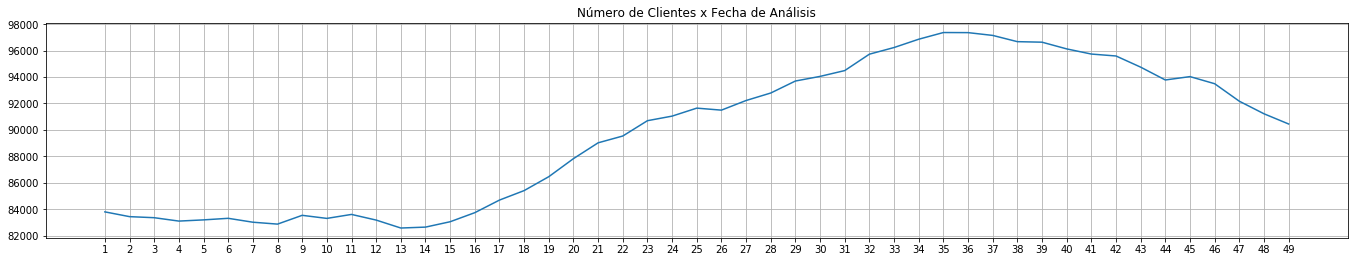

In [13]:
from matplotlib.ticker import NullFormatter
# plot with various axes scales
plt.figure(figsize=(50,8))
# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('Número de Clientes x Fecha de Análisis')
plt.grid(True)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()

- donde:

1:201407
2:201408
3:201409
4:201410
5:201411
6:201412
7:201501
8:201502
9:201503
10:201504
11:201505
12:201506
13:201507
14:201508
15:201509
16:201510
17:201511
18:201512
19:201601
20:201602
21:201603
22:201604
23:201605
24:201606
25:201607
26:201608
27:201609
28:201610
29:201611
30:201612
31:201701
32:201702
33:201703
34:201704
35:201705
36:201706
37:201707
38:201708
39:201709
40:201710
41:201711
42:201712
43:201801
44:201802
45:201803
46:201804
47:201805
48:201806
49:201807

### Análisis y Selección de Variables
inicialmente se consideran dos técnicas para la selección de variables, estas son la regresión lassoCV y la regresión RidgeCV ambas agrupadas por cliente como unidad muestral  

In [14]:
df0 = df_entrenar.copy()

In [15]:
lista_total = df0.columns.tolist()

In [16]:
lista_total

['fecha',
 'id',
 'atm_fa_cont',
 'marca_rodamiento',
 'marca_huesped_pura',
 'marca_perdio_ddir',
 'marca_mora_sup_61',
 'cast_fa',
 'ddir_cliente',
 'saldok',
 'cnt_b2b',
 'cnt_auto',
 'cnt_pp',
 'cnt_sob',
 'cnt_tdc',
 'max_madurez_b2b',
 'max_madurez_auto',
 'max_madurez_pp',
 'max_madurez_sob',
 'max_madurez_tdc',
 'madurez',
 'prom_atm_fa_12m',
 'std_atm_fa_12m',
 'prom_atm_fa_6m',
 'std_atm_fa_6m',
 'prom_atm_fa_3m',
 'std_atm_fa_3m',
 'vari_atm_fp0_3m',
 'vari_atm_fp0_6m',
 'vari_atm_fp0_12m',
 'atm_fa_cont_90_12m',
 'cast_12m',
 'default_90_12m',
 'repr_ddir_cliente_3m',
 'repr_ddir_cliente_12m',
 'repr_mora_sup_61_12m',
 'repr_rodamientos_12m',
 'repr_huesped_pura_cliente_12m',
 'nonull_ult12',
 'random_normal',
 'random_uniforme']

In [17]:
target_name = "default_90_12m"
y = df0[target_name]
X = df0.drop([target_name,'fecha','id','cast_fa','cast_12m','atm_fa_cont_90_12m','atm_fa_cont','marca_huesped_pura',
              'ddir_cliente','saldok','cnt_b2b','cnt_auto','cnt_pp','cnt_sob','cnt_tdc','max_madurez_b2b',
               'max_madurez_auto','max_madurez_pp','max_madurez_sob','max_madurez_tdc','madurez'], axis=1)

In [18]:
print(X.shape)
print(y.shape)

(4398017, 20)
(4398017,)


In [19]:
X.isna().sum().sum()

0

In [20]:
X.columns

Index(['marca_rodamiento', 'marca_perdio_ddir', 'marca_mora_sup_61', 'prom_atm_fa_12m', 'std_atm_fa_12m', 'prom_atm_fa_6m', 'std_atm_fa_6m', 'prom_atm_fa_3m', 'std_atm_fa_3m', 'vari_atm_fp0_3m', 'vari_atm_fp0_6m', 'vari_atm_fp0_12m', 'repr_ddir_cliente_3m', 'repr_ddir_cliente_12m', 'repr_mora_sup_61_12m', 'repr_rodamientos_12m', 'repr_huesped_pura_cliente_12m', 'nonull_ult12', 'random_normal', 'random_uniforme'], dtype='object')

In [21]:
# fairly unbalanced
y.value_counts()/y.count()

0    0.897869
1    0.102131
Name: default_90_12m, dtype: float64

- se aplica la función standard scaler al conjunto de covariables 

In [22]:
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)

In [23]:
print(scaled)

[[-0.24461316 -0.03666428 -0.12755744 ...  0.25866734 -0.10644978
  -0.79990221]
 [-0.24461316 -0.03666428 -0.12755744 ...  0.25866734  0.25576085
   1.25927505]
 [-0.24461316 -0.03666428 -0.12755744 ...  0.25866734  0.94669867
   0.51776609]
 ...
 [-0.24461316 -0.03666428 -0.12755744 ...  0.25866734  0.11090355
  -0.40328993]
 [-0.24461316 -0.03666428 -0.12755744 ...  0.25866734  1.5628286
   0.05212154]
 [ 4.06919846 -0.03666428 -0.12755744 ...  0.25866734  0.53911372
  -1.64263076]]


### Método 1 : Regresión Lasso CV

In [24]:
groups_logit = df0.id

In [25]:
from sklearn.linear_model import LogisticRegressionCV
gkf_logit = GroupKFold(n_splits=2)
cv_logit = gkf_logit.split(scaled,y, groups_logit)
clf = LogisticRegressionCV(cv=cv_logit,n_jobs=-1,penalty = 'l1',solver = "saga").fit(scaled,y)
importance = np.abs(clf.coef_)
print(importance)

C:\Users\dsosa\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\dsosa\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\dsosa\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\dsosa\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\dsosa\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

[[4.45650556e-01 5.79600056e-02 2.19036786e-01 2.26799674e-01
  3.15219586e-02 2.52711023e-01 3.30937082e-01 4.58588695e-01
  2.43193711e-02 5.61722835e-03 2.43606454e-02 5.07951488e-02
  2.72349102e-01 1.40948313e-01 2.00257464e-01 2.10644610e-01
  3.45773641e-01 2.38866498e-01 1.97864235e-03 3.66755703e-04]]


C:\Users\dsosa\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [26]:
y_pred_logit = clf.predict(scaled) 

In [27]:
y_pred_logit

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
metrics.roc_auc_score(y,y_pred_logit)

0.6186686604644752

In [29]:
metrics.average_precision_score(y,y_pred_logit)

0.2496115115942139

In [30]:
metrics.confusion_matrix(y,y_pred_logit)

array([[3898886,   49959],
       [ 336884,  112288]], dtype=int64)

In [31]:
clf.coef_.flatten()

array([ 4.45650556e-01,  5.79600056e-02,  2.19036786e-01,  2.26799674e-01,
        3.15219586e-02, -2.52711023e-01,  3.30937082e-01,  4.58588695e-01,
        2.43193711e-02,  5.61722835e-03,  2.43606454e-02,  5.07951488e-02,
       -2.72349102e-01,  1.40948313e-01, -2.00257464e-01,  2.10644610e-01,
       -3.45773641e-01, -2.38866498e-01,  1.97864235e-03,  3.66755703e-04])

In [32]:
importance

array([[4.45650556e-01, 5.79600056e-02, 2.19036786e-01, 2.26799674e-01,
        3.15219586e-02, 2.52711023e-01, 3.30937082e-01, 4.58588695e-01,
        2.43193711e-02, 5.61722835e-03, 2.43606454e-02, 5.07951488e-02,
        2.72349102e-01, 1.40948313e-01, 2.00257464e-01, 2.10644610e-01,
        3.45773641e-01, 2.38866498e-01, 1.97864235e-03, 3.66755703e-04]])

In [33]:
coef_logit = pd.Series(clf.coef_.flatten(), index = X.columns)

In [34]:
logit_coef = pd.DataFrame(coef_logit.sort_values(ascending=False))

In [35]:
print("Logistic picked " + str(sum(coef_logit != 0)) + " variables and eliminated the other " +  
      str(sum(coef_logit == 0)) + " variables")

Logistic picked 20 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using Logistic Model')

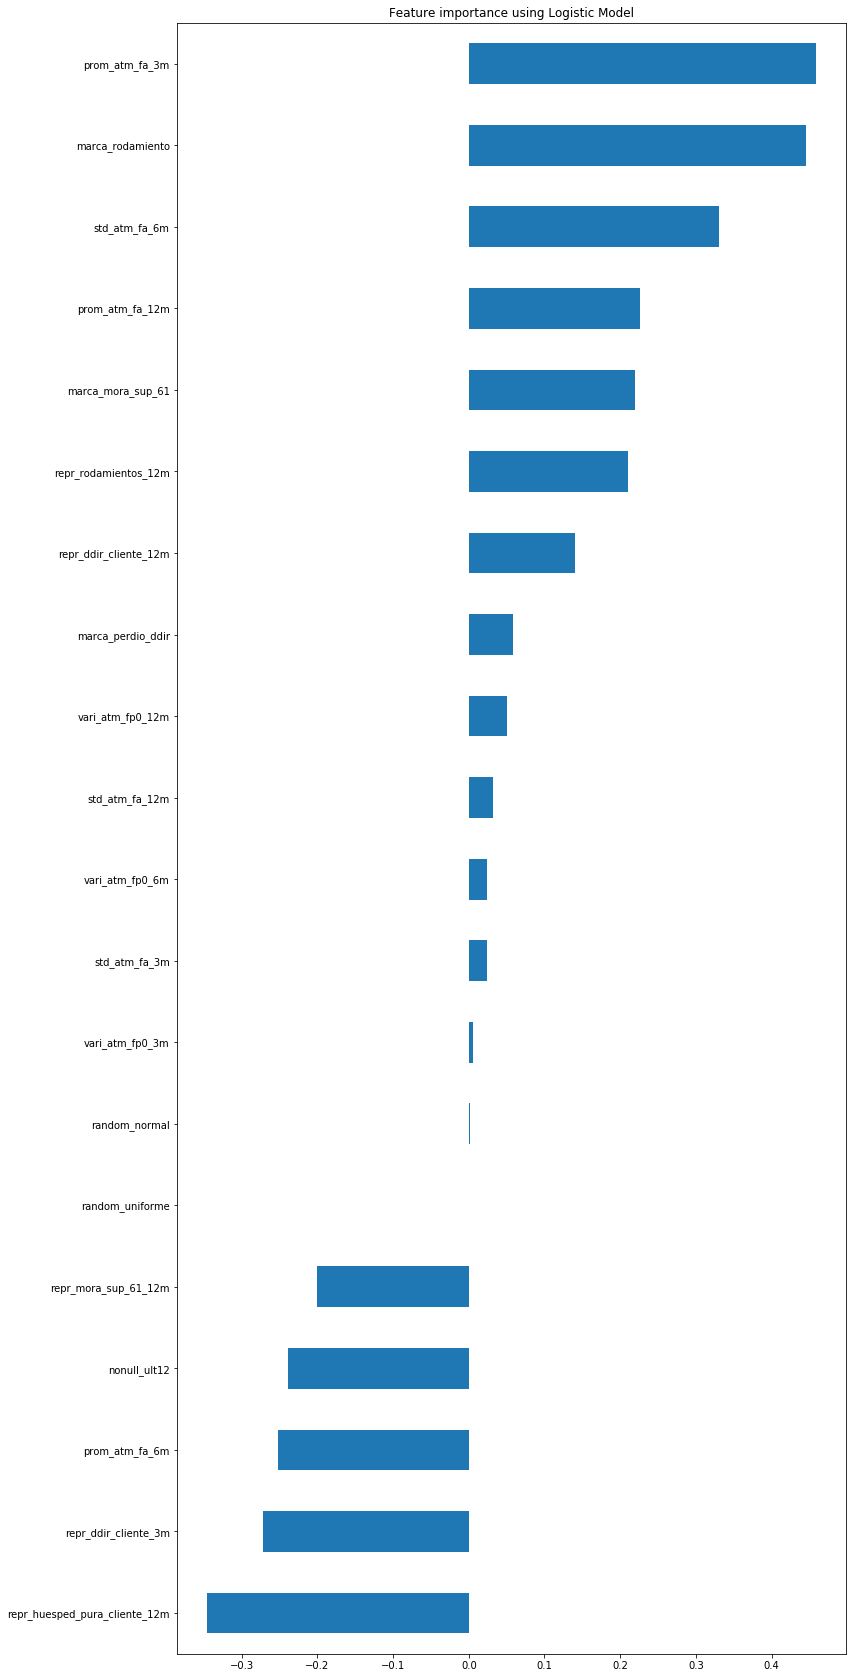

In [36]:
imp_coef = coef_logit.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 30.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Logistic Model")

### Método 2 : RidgeCV

In [37]:
from sklearn.linear_model import RidgeClassifierCV
groups_ridge = df0.id

In [38]:
gkf_ridge = GroupKFold(n_splits=2)
cv_ridge = gkf_ridge.split(scaled,y, groups_ridge)
clf_ridge = RidgeClassifierCV(cv=cv_ridge).fit(scaled,y)

In [39]:
y_pred_ridge = clf_ridge.predict(scaled)

In [40]:
y_prob_ridge = np.where(y_pred_ridge<0,0,y_pred_ridge)

In [41]:
y_pred_ridge

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
y_prob_ridge = np.where(y_pred_ridge<0,0,y_pred_ridge)
y_prob_ridge = np.where(y_pred_ridge>1,1,y_pred_ridge)

In [43]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics
metrics.roc_auc_score(y,y_pred_ridge)

0.6050410178957829

In [44]:
metrics.average_precision_score(y,y_pred_ridge)

0.23865588855185282

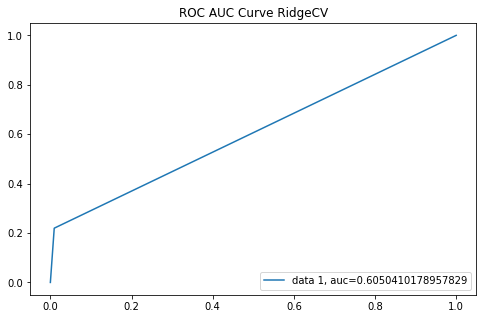

In [45]:
plt.figure(figsize=(8,5))
fpr, tpr, _ = metrics.roc_curve(y,y_pred_ridge)
auc = metrics.roc_auc_score(y,y_pred_ridge)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title("ROC AUC Curve RidgeCV")
plt.show()

In [46]:
y_pred_ridge = np.where(y_prob_ridge >= 0.17,1,0)

In [47]:
metrics.confusion_matrix(y,y_pred_ridge)

array([[3911200,   37645],
       [ 350527,   98645]], dtype=int64)

C:\Users\dsosa\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\dsosa\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


(0, 1)

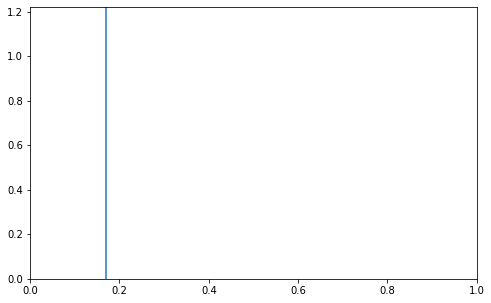

In [48]:
plt.figure(figsize=(8,5))
plt.axvline(0.17)
sns.kdeplot(y_prob_ridge[y_pred_ridge == 0])
sns.kdeplot(y_prob_ridge[y_pred_ridge == 1])
plt.xlim(0,1)

In [49]:
coef_ridge = pd.Series(clf_ridge.coef_.flatten(), index = X.columns)

In [50]:
ridge_coeff = coef_ridge.sort_values(ascending=False)

In [51]:
print("Ridge picked " + str(sum(coef_ridge != 0)) + " variables and eliminated the other " +  
      str(sum(coef_ridge == 0)) + " variables")

Ridge picked 20 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using Ridge Model')

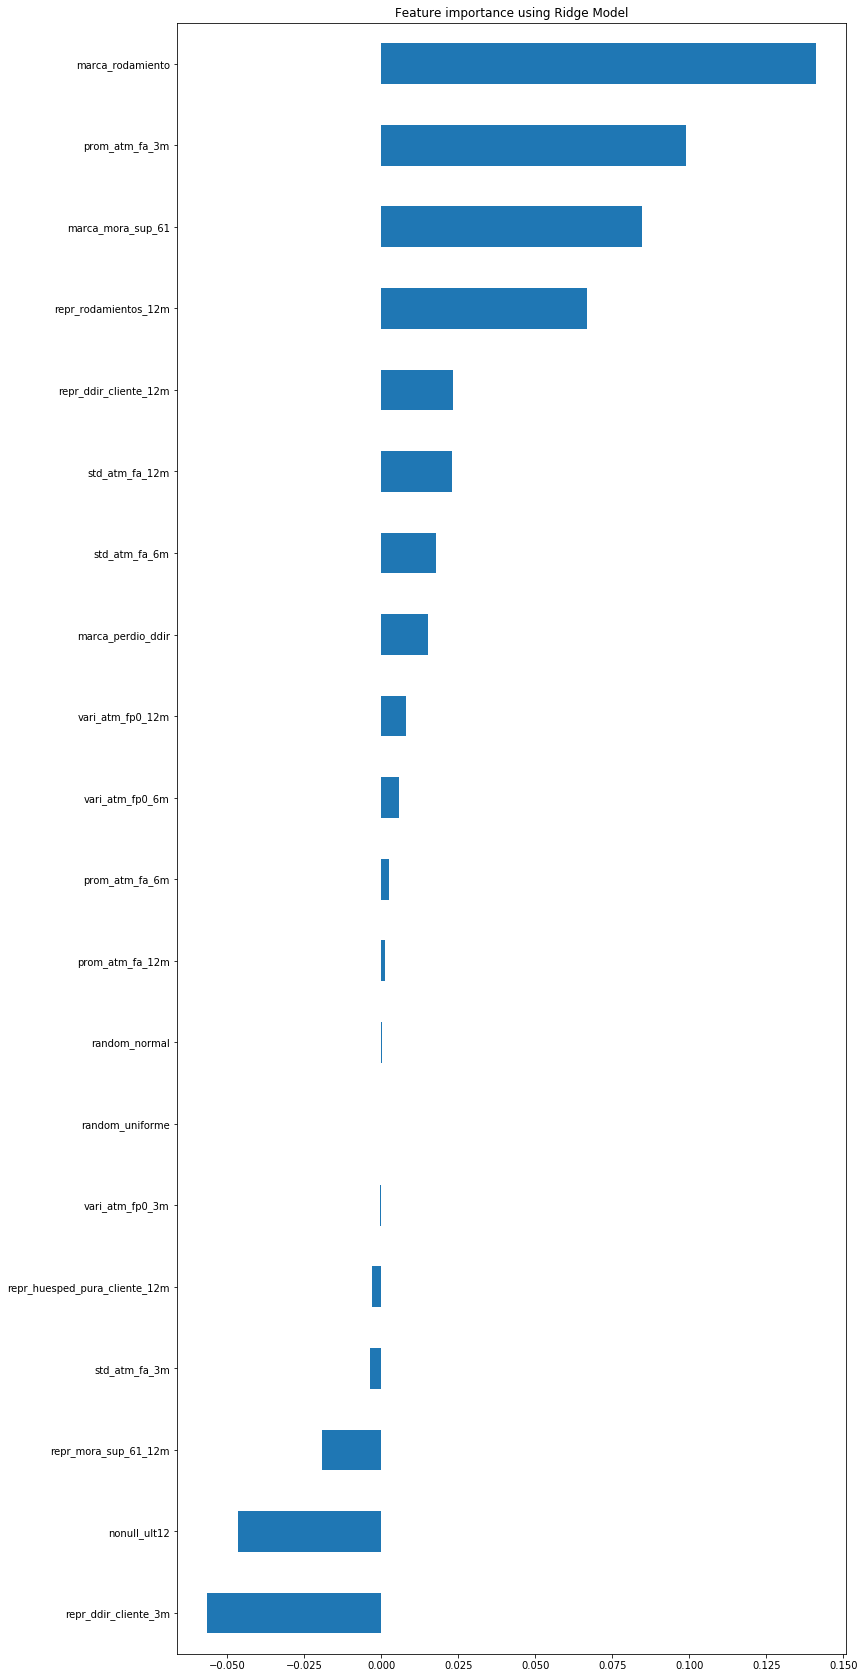

In [52]:
imp_coef = coef_ridge.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 30.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")

### Mutual Info
- Mutual information mide la dependencia entre variables. Es igual a cero si y solo si dos variables son independientes, y valores altos significan alta dependencia. 
- la función es basada en métodos no parámetricos de distancias k-nearest neighbors. Puede ser usado para selección de variables univariadas.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html

In [53]:
X.columns

Index(['marca_rodamiento', 'marca_perdio_ddir', 'marca_mora_sup_61', 'prom_atm_fa_12m', 'std_atm_fa_12m', 'prom_atm_fa_6m', 'std_atm_fa_6m', 'prom_atm_fa_3m', 'std_atm_fa_3m', 'vari_atm_fp0_3m', 'vari_atm_fp0_6m', 'vari_atm_fp0_12m', 'repr_ddir_cliente_3m', 'repr_ddir_cliente_12m', 'repr_mora_sup_61_12m', 'repr_rodamientos_12m', 'repr_huesped_pura_cliente_12m', 'nonull_ult12', 'random_normal', 'random_uniforme'], dtype='object')

In [62]:
df = df0[['id','marca_rodamiento', 'marca_perdio_ddir', 'marca_mora_sup_61', 'prom_atm_fa_12m', 'std_atm_fa_12m', 
          'prom_atm_fa_6m', 'std_atm_fa_6m', 'prom_atm_fa_3m', 'std_atm_fa_3m', 'vari_atm_fp0_3m', 'vari_atm_fp0_6m', 
          'vari_atm_fp0_12m', 'repr_ddir_cliente_3m', 'repr_ddir_cliente_12m', 'repr_mora_sup_61_12m', 
          'repr_rodamientos_12m', 'repr_huesped_pura_cliente_12m', 'nonull_ult12', 'random_normal', 'random_uniforme',
          'default_90_12m']]

In [63]:
df.head()

,id,marca_rodamiento,marca_perdio_ddir,marca_mora_sup_61,prom_atm_fa_12m,std_atm_fa_12m,prom_atm_fa_6m,std_atm_fa_6m,prom_atm_fa_3m,std_atm_fa_3m,vari_atm_fp0_3m,vari_atm_fp0_6m,vari_atm_fp0_12m,repr_ddir_cliente_3m,repr_ddir_cliente_12m,repr_mora_sup_61_12m,repr_rodamientos_12m,repr_huesped_pura_cliente_12m,nonull_ult12,random_normal,random_uniforme,default_90_12m
1,264349,0,0,0,13.583333,27.605857,27.166667,35.125015,0.000000,0.000000,0.0,-1.0,-1.0,0.0,0.0,0.083333,0.25,0.0,12,-0.106854,0.269025,0
2,367623,0,0,0,2.083333,7.216878,4.166667,10.206207,8.333333,14.433757,2.0,5.0,11.0,1.0,1.0,0.000000,0.00,0.0,12,0.255395,0.863340,1
3,288289,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.000000,0.00,0.0,12,0.946406,0.649328,0
4,98569158,0,0,0,0.583333,0.900337,0.666667,1.032796,0.666667,1.154701,-1.0,-1.0,-1.0,0.0,0.0,0.000000,0.25,0.0,12,-1.150360,0.874202,0
6,443959,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.000000,0.00,0.0,12,-0.878837,0.938696,0


In [64]:
df.shape

(4398017, 22)

- las filas abarcan varios clientes que no necesariamente tienen que ver uno con el otro (de hecho cada cliente tiene muestras diferentes en diferentes fechas). En este caso se tiene una matriz de correlación en la que se visualiza que tan correlacionadas están las variables en relación a la población por cliente
- Como la información no se tiene x cliente en una sóla fila se realiza esta forma de corr. las observaciones son independientes una de la otra 

In [65]:
xfilter = df.id.value_counts()[df.id.value_counts()>6].index.tolist()

In [66]:
df_filterd = df[df.id.isin(xfilter)]

In [67]:
df_filterd.head()

,id,marca_rodamiento,marca_perdio_ddir,marca_mora_sup_61,prom_atm_fa_12m,std_atm_fa_12m,prom_atm_fa_6m,std_atm_fa_6m,prom_atm_fa_3m,std_atm_fa_3m,vari_atm_fp0_3m,vari_atm_fp0_6m,vari_atm_fp0_12m,repr_ddir_cliente_3m,repr_ddir_cliente_12m,repr_mora_sup_61_12m,repr_rodamientos_12m,repr_huesped_pura_cliente_12m,nonull_ult12,random_normal,random_uniforme,default_90_12m
1,264349,0,0,0,13.583333,27.605857,27.166667,35.125015,0.000000,0.000000,0.0,-1.0,-1.0,0.0,0.0,0.083333,0.25,0.0,12,-0.106854,0.269025,0
2,367623,0,0,0,2.083333,7.216878,4.166667,10.206207,8.333333,14.433757,2.0,5.0,11.0,1.0,1.0,0.000000,0.00,0.0,12,0.255395,0.863340,1
3,288289,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.000000,0.00,0.0,12,0.946406,0.649328,0
4,98569158,0,0,0,0.583333,0.900337,0.666667,1.032796,0.666667,1.154701,-1.0,-1.0,-1.0,0.0,0.0,0.000000,0.25,0.0,12,-1.150360,0.874202,0
6,443959,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.000000,0.00,0.0,12,-0.878837,0.938696,0


In [68]:
from sklearn.feature_selection import mutual_info_classif

N = 1000 #definir cuantas muestras de clientes 
X_vals= df_filterd.drop('id',axis=1)
id_cols = df_filterd.id
clientes = df_filterd.id.unique() # lista de clientes únicos 
picks = list(np.random.choice(clientes,size = N)) # se toma una m.a de N clientes 
mutual_infos= list()

for k,i in enumerate(picks):
    print(k,i)
    vals = X_vals[id_cols == i]
    xval = vals.drop("default_90_12m", axis=1).values
    yval =  vals["default_90_12m"].values
    mutual_info = mutual_info_classif(xval, yval, discrete_features="auto",random_state=123)
    mutual_infos.append(mutual_info)

0 469928
1 130553
2 65079485
3 315214
4 190169
5 98859648
6 98640155
7 22187
8 538643
9 369984
10 520395
11 98896078
12 98779421
13 98813358
14 158752
15 98680386
16 98730993
17 98843435
18 98914370
19 98761791
20 334546
21 98919253
22 98567684
23 439971
24 404427
25 403458
26 427632
27 98566140
28 98745592
29 272431
30 60423811
31 67014423
32 98746704
33 109502
34 60211067
35 365894
36 311498
37 422724
38 98870815
39 98518824
40 174169
41 98823101
42 98704457
43 216004
44 98724187
45 98957451
46 136742
47 900000000341943/640
48 98678100
49 496431
50 98817899
51 468236
52 488947
53 98735270
54 523780
55 60088812
56 510057
57 179619
58 48222400
59 485790
60 900000000213635/640
61 54059910
62 98829576
63 98538570
64 98875812
65 98527487
66 98660814
67 98822192
68 48093991
69 559110
70 98627690
71 98743110
72 98589147
73 98837082
74 98731946
75 98949363
76 161994
77 450420
78 98953380
79 98656177
80 98569452
81 98728936
82 184194
83 98760477
84 76014802
85 98751090
86 166932
87 549880
88 

683 98859541
684 98878612
685 202978
686 98732856
687 98701384
688 98612650
689 361029
690 397422
691 272591
692 346560
693 98926596
694 490723
695 516974
696 76045285
697 98864685
698 61090387
699 98806385
700 98660741
701 70003868
702 98760160
703 98881716
704 145413
705 405136
706 98703448
707 98725489
708 98669567
709 98584798
710 160128
711 66006487
712 98560912
713 408114
714 98834781
715 98878305
716 98554175
717 143980
718 98811523
719 98721548
720 98526790
721 516655
722 98723897
723 98905859
724 134930
725 427170
726 183060
727 98870059
728 506212
729 98627421
730 98821498
731 676203
732 98837741
733 489909
734 98673109
735 65044257
736 201301
737 458004
738 98672080
739 98614576
740 411678
741 98869858
742 60146164
743 420689
744 98530726
745 98667795
746 98557164
747 410161
748 158540
749 98882506
750 98866877
751 60411394
752 157063
753 388766
754 98897291
755 60692639
756 98524978
757 98874647
758 110861
759 98770990
760 160906
761 98830829
762 98933927
763 456618
764 203

In [69]:
result_mi = pd.DataFrame(np.array(mutual_infos).mean(axis=0))

In [70]:
result_mi["variable_name"] = ['marca_rodamiento', 'marca_perdio_ddir', 'marca_mora_sup_61', 'prom_atm_fa_12m', 
                              'std_atm_fa_12m', 'prom_atm_fa_6m', 'std_atm_fa_6m', 'prom_atm_fa_3m', 'std_atm_fa_3m', 
                              'vari_atm_fp0_3m', 'vari_atm_fp0_6m', 'vari_atm_fp0_12m', 'repr_ddir_cliente_3m', 
                              'repr_ddir_cliente_12m', 'repr_mora_sup_61_12m', 'repr_rodamientos_12m', 
                              'repr_huesped_pura_cliente_12m', 'nonull_ult12', 'random_normal', 'random_uniforme']

In [71]:
result_mi

,0,variable_name
0,0.012137,marca_rodamiento
1,0.007338,marca_perdio_ddir
2,0.008688,marca_mora_sup_61
3,0.053924,prom_atm_fa_12m
4,0.055696,std_atm_fa_12m
5,0.043998,prom_atm_fa_6m
6,0.044035,std_atm_fa_6m
7,0.028926,prom_atm_fa_3m
8,0.026420,std_atm_fa_3m
9,0.013482,vari_atm_fp0_3m


### Rankeo
- En el rankeo de variables se usaron 3 metodologías de selección, en su orden, lassocv, ridgecv y matriz de correlación con la vble objetivo.
- Seguidamnete se crea un dataframe que contenga las variables y en cada columna el peso que asigna a cada uno los diferentes métodos (lasso-ridge-corr). ver variable : result_fe_scores
- Luego se rankea por máximo cada uno de los métodos y se guardan en dataframe (rank_lasso, rank_ridge, rank_corr). 
- Finalmente tenemos 3 votantes los cuales se totalizan y se ordenan para tener así las variables tentativas seleccionadas en esta primera instancia para iniciar la modelación. cabe anotar que en el inicio se creó variables de ruido con el fin de determinar si estás aportaban más que variables construidas por lo que es un excelente punto de corte en la importancia de variables inicialmente seleccionadas

In [72]:
base1 = logit_coef

In [73]:
base1.head()

,0
prom_atm_fa_3m,0.458589
marca_rodamiento,0.445651
std_atm_fa_6m,0.330937
prom_atm_fa_12m,0.226800
marca_mora_sup_61,0.219037


In [74]:
base2 = pd.DataFrame(ridge_coeff.sort_values(ascending=False))

In [75]:
base2.head()

,0
marca_rodamiento,0.141108
prom_atm_fa_3m,0.098827
marca_mora_sup_61,0.084503
repr_rodamientos_12m,0.066855
repr_ddir_cliente_12m,0.023219


In [76]:
base3 = result_mi

In [77]:
base3.head()

,0,variable_name
0,0.012137,marca_rodamiento
1,0.007338,marca_perdio_ddir
2,0.008688,marca_mora_sup_61
3,0.053924,prom_atm_fa_12m
4,0.055696,std_atm_fa_12m


In [78]:
lasso_ridge = base1.join(base2,lsuffix = "_lasso", rsuffix = "_ridge")

In [79]:
lasso_ridge

,0_lasso,0_ridge
prom_atm_fa_3m,0.458589,0.098827
marca_rodamiento,0.445651,0.141108
std_atm_fa_6m,0.330937,0.017788
prom_atm_fa_12m,0.226800,0.001320
marca_mora_sup_61,0.219037,0.084503
repr_rodamientos_12m,0.210645,0.066855
repr_ddir_cliente_12m,0.140948,0.023219
marca_perdio_ddir,0.057960,0.015208
vari_atm_fp0_12m,0.050795,0.007857
std_atm_fa_12m,0.031522,0.022926


In [80]:
result_fe_scores = base3.join(lasso_ridge,rsuffix = "_mutual",on="variable_name")

In [81]:
result_fe_scores

,0,variable_name,0_lasso,0_ridge
0,0.012137,marca_rodamiento,0.445651,0.141108
1,0.007338,marca_perdio_ddir,0.057960,0.015208
2,0.008688,marca_mora_sup_61,0.219037,0.084503
3,0.053924,prom_atm_fa_12m,0.226800,0.001320
4,0.055696,std_atm_fa_12m,0.031522,0.022926
5,0.043998,prom_atm_fa_6m,-0.252711,0.002400
6,0.044035,std_atm_fa_6m,0.330937,0.017788
7,0.028926,prom_atm_fa_3m,0.458589,0.098827
8,0.026420,std_atm_fa_3m,0.024319,-0.003717
9,0.013482,vari_atm_fp0_3m,0.005617,-0.000398


In [82]:
result_fe_scores = result_fe_scores.rename({0: 'mutual','0_lasso':'lasso','0_ridge': 'ridge'},axis = 1)

### Rankeo

In [83]:
#lasso
result_fe_scores['rank_lasso'] = result_fe_scores.lasso.rank(method = "max")

In [84]:
#ridge
result_fe_scores['rank_ridge'] = result_fe_scores.ridge.rank(method = "max")

In [85]:
#mutual
result_fe_scores['rank_mutual'] = result_fe_scores.mutual.rank(method = "max")

In [86]:
result_fe_scores['total']=result_fe_scores[["rank_lasso","rank_ridge","rank_mutual"]].sum(axis = 1)

In [87]:
result_fe_scores = result_fe_scores.sort_values(by='total',ascending=False)

In [88]:
result_fe_scores

,mutual,variable_name,lasso,ridge,rank_lasso,rank_ridge,rank_mutual,total
6,0.044035,std_atm_fa_6m,0.330937,0.017788,18.0,14.0,18.0,50.0
7,0.028926,prom_atm_fa_3m,0.458589,0.098827,20.0,19.0,11.0,50.0
15,0.039328,repr_rodamientos_12m,0.210645,0.066855,15.0,17.0,16.0,48.0
4,0.055696,std_atm_fa_12m,0.031522,0.022926,11.0,15.0,20.0,46.0
3,0.053924,prom_atm_fa_12m,0.226800,0.001320,17.0,9.0,19.0,45.0
0,0.012137,marca_rodamiento,0.445651,0.141108,19.0,20.0,5.0,44.0
13,0.032437,repr_ddir_cliente_12m,0.140948,0.023219,14.0,16.0,14.0,44.0
11,0.033024,vari_atm_fp0_12m,0.050795,0.007857,12.0,12.0,15.0,39.0
2,0.008688,marca_mora_sup_61,0.219037,0.084503,16.0,18.0,4.0,38.0
10,0.024903,vari_atm_fp0_6m,0.024361,0.005730,10.0,11.0,9.0,30.0


Text(0.5, 1.0, 'Rankeo de Variables por votantes')

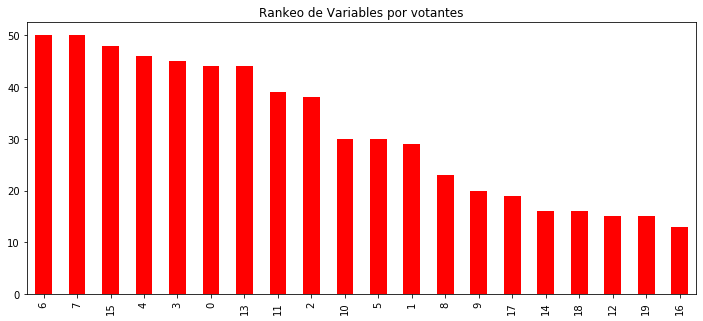

In [89]:
plt.figure(figsize=(12,5))
result_fe_scores.total.plot(kind="bar",color = "red")
plt.title("Rankeo de Variables por votantes")

In [ ]:
#scaler

In [ ]:
#result_fe_scores["mi_scaled_mutual"] = scaler.fit_transform(result_fe_scores["mutual"].values.reshape(-1,1))

In [ ]:
#result_fe_scores["mi_scaled_lass"] = scaler.fit_transform(result_fe_scores["lasso"].values.reshape(-1,1))

In [ ]:
#result_fe_scores["mi_scaled_ridge"] = scaler.fit_transform(result_fe_scores["ridge"].values.reshape(-1,1))

In [ ]:
#result_fe_scores

In [ ]:
#plt.figure(figsize=(10,10))
#result_fe_scores.plot(kind="bar",color="red")

In [ ]:
result_fe_scores['rank_mutual_scaled'] = result_fe_scores.mi_scaled_mutual.rank(method = "max")

In [ ]:
result_fe_scores['rank_lasso_scaled'] = result_fe_scores.mi_scaled_lass.rank(method = "max")

In [ ]:
result_fe_scores['rank_ridge_scaled'] = result_fe_scores.mi_scaled_ridge.rank(method = "max")

In [ ]:
result_fe_scores

In [ ]:
result_fe_scores['total']=result_fe_scores[["rank_mutual_scaled","rank_lasso_scaled","rank_ridge_scaled"]].sum(axis = 1)

In [ ]:
result_fe_scores = result_fe_scores.sort_values(by='total',ascending=False)

In [ ]:
result_fe_scores

## hasta aca la selección con minscaler

In [ ]:
result_fe_scores['rank_lasso'] = result_fe_scores.lasso.rank(method = "max")

In [ ]:
result_fe_scores

In [ ]:
result_fe_scores['rank_ridge'] = result_fe_scores.ridge.rank(method = "max")

In [ ]:
result_fe_scores

In [ ]:
result_fe_scores['rank_mutual'] = result_fe_scores["mutual"].rank(method = "max")

In [ ]:
result_fe_scores

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
result_fe_scores['total']=result_fe_scores[["rank_mutual_scaled","rank_lasso","rank_ridge"]].sum(axis = 1)

In [ ]:
result_fe_scores['total']=result_fe_scores[["rank_lasso","rank_ridge"]].sum(axis = 1)

In [ ]:
result_fe_scores = result_fe_scores.sort_values(by='total',ascending=False)

In [ ]:
result_fe_scores

In [ ]:
plt.figure(figsize=(12,5))
result_fe_scores.total.plot(kind="bar",color = "red")

### Para selección de variables
- Se puede usar la fracción votante para la selección final de las variables, es decir, 3 métodos, se busca el top 25 de las variables y si en 2 de 3 está la variable se lleva 1 punto....